In [1]:
*import pandas as pd
import matplotlib.pyplot as plt
import numpy as np*

In [5]:
*train_df = pd.read_csv('C:/Users/hp/Downloads/Google_Stock_Price_Train.csv')
train_df.info()*


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:

*test_df = pd.read_csv('C:/Users/hp/Downloads/Google_Stock_Price_Test (1).csv')
test_df.info()*


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [9]:
*train = train_df.loc[:,["Open"]].values
train.shape*

(1258, 1)

In [11]:
*from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()*

In [13]:
*train_scaled = scaler.fit_transform(train)*


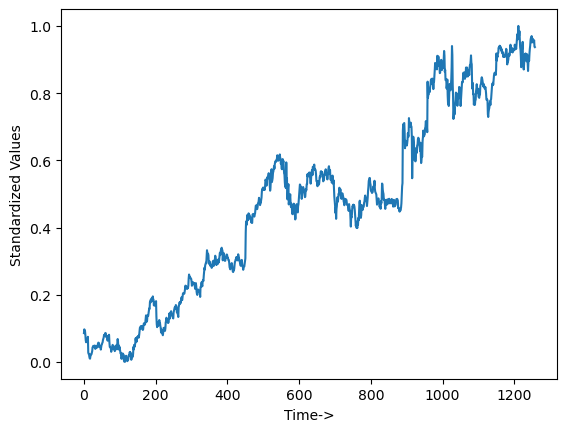

In [15]:
*plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()*


In [17]:
*x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)*


In [19]:
*x_train.shape,y_train.shape*


((1198, 60), (1198,))

In [21]:
*x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape*

(1198, 60, 1)

In [23]:
*from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout*

In [25]:
*model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()*


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
*model.fit(x_train,y_train,epochs=100,batch_size=30,validation_split=0.05)*

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.5059 - val_loss: 0.0366
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2718 - val_loss: 0.0174
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2225 - val_loss: 8.3272e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1502 - val_loss: 0.0199
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1360 - val_loss: 0.0129
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0856 - val_loss: 0.0166
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0785 - val_loss: 0.0237
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0660 - val_loss: 0.0038
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0653 - val_loss: 8.6021e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0494 - val_loss: 0.0121
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0413 - val_loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2

In [28]:
*data = pd.concat((train_df['Open'],test_df['Open']),axis=0)*


In [29]:
*test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape*


(80,)

In [33]:
*test_input = test_input.reshape(-1,1)
test_input.shape*


(80, 1)

In [35]:
*test_scaled = scaler.transform(test_input)*

In [37]:
*x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape*


(20, 60)

In [39]:
*x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape*


(20, 60, 1)

In [41]:
*y_test = test_df.loc[:,"Open"].values*

In [43]:
*y_pred = model.predict(x_test)*


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step


In [45]:
*y_pred = scaler.inverse_transform(y_pred)*



In [47]:
*output = model.evaluate(x=x_test,y=y_test)*


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - loss: 650790.1875


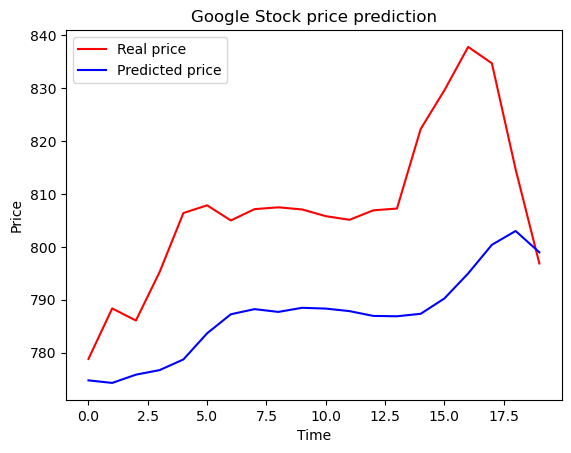

In [49]:
*plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()*
